**Project Title:**

Predicting Customer Churn

**Project Overview**

In this project, we will work with a real-world dataset from a telecom company that includes
customer information, such as demographics, usage patterns, and whether they churned (i.e., left
the company) or not. The goal is to prepare the data for analysis, explore key patterns and trends,
and create visualizations to gain insights into factors influencing customer churn.

**Project Objectives:**
1. Clean and preprocess the raw dataset to make it suitable for analysis.
2. Explore the dataset to understand the distribution of key variables.
3. Identify factors that may be associated with customer churn.
4. Create informative visualizations to communicate findings effectively.

**Project Description**

Customer churn refers to the number or percentage of customers who stop doing business with a company over a given period. In other words, it is the rate at which customers leave or discontinue using a company's products or services. Churn can be caused by various reasons such as dissatisfaction with the product or service, competitive offerings, changes in customer needs, or external factors. Understanding and managing customer churn is important for businesses as it can have a significant impact on revenue, growth, and customer satisfaction. In this project we are going to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

**Project Tasks:**
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis
3. Data Visualization

**Data Cleaning and Preprocessing:**
The first step of the analysis consists of loading and storing the data in a Pandas data frame using the pandas.read_csv function.

In [13]:
# import telecom dataset into a pandas data frame
import pandas as pd
df_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# visualize column names
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [2]:
# check unique values of each column
for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

As can be seen above, the data set contains 21 columns which can be classified into 3 groups:

(1) Demographic Information

    gender: Whether the client is a female or a male (Female, Male).
    SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
    Partner: Whether the client has a partner or not (Yes, No).
    Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

    tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
    Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
    PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
    PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
    MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
    TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

    PhoneService: Whether the client has a phone service or not (Yes, No).
    MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
    InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
    OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
    OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
    DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
    TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
    StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
    StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

Missing values and data types

At the beginning of EDA, we want to know as much information as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [3]:
# Check Data Tpyesummary of the data frame
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [16]:
# transform the column TotalCharges into a numeric data type
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check for missing values
df_telco.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above, we can now observe that the column TotalCharges has 11 missing values.
These observations have also a tenure of 0, even though MontlyCharges is not null for these entries. This information appeared to be contradictory, and since the quantity is not huge enough to affect our data analysis, we decide to remove those observations from the data set.

In [17]:
# drop observations with null values
df_telco.dropna(inplace=True)

Remove customerID column

The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [8]:
# drop the customerID column from the dataset
df_telco.drop(columns='customerID', inplace=True)

Payment method denominations

As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [9]:
# unique elements of the PaymentMethod column
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
# remove (automatic) from payment method names
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# unique elements of the PaymentMethod column after the modification 
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

**Data Exploration and Visualzation**

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

In [13]:
# Perform descriptive statistics to summarize the dataset
df_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#Univariate Analysis

In [15]:
# Ananlyze the Churn column

df_telco["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

From the above, it can be seen that a total of 1869 customers churned

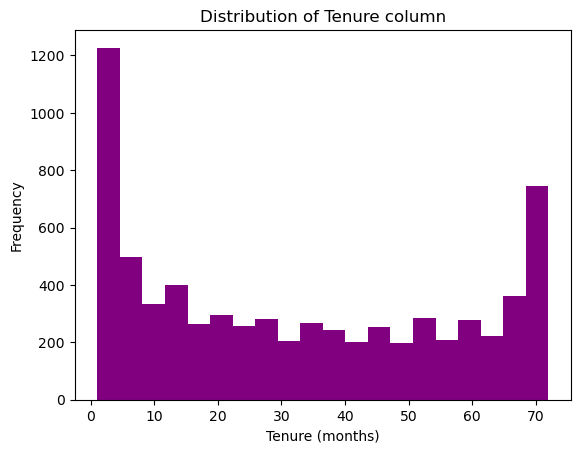

In [21]:
# Create a histogram of the Tenure column
import matplotlib.pyplot as plt
plt.hist(df_telco['tenure'], bins=20, color='purple')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title("Distribution of Tenure column")
plt.show()

From the above chart we could see that the company get a lot of new customers signing up for services. Most of which stay up to about 74 months before churning.

**Now lets see thier distribution according to gender**

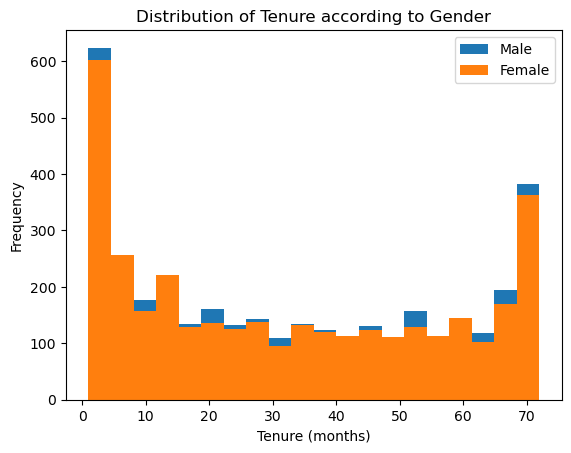

In [20]:

# separate the data into two categories based on gender
male_tenure = df_telco.loc[df_telco['gender'] == 'Male', 'tenure']
female_tenure = df_telco.loc[df_telco['gender'] == 'Female', 'tenure']

# create a histogram with two colors
plt.title("Distribution of Tenure according to Gender")
plt.hist(male_tenure, bins=20, label='Male')
plt.hist(female_tenure, bins=20,  label='Female')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [22]:
# Analyze Customers who have partners and those who do not

df_telco["Partner"].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

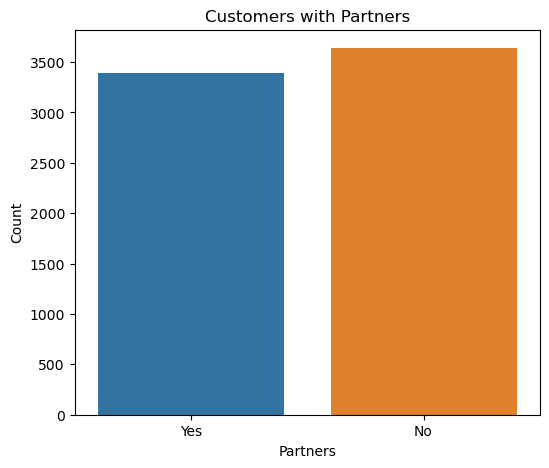

In [25]:
plt.figure(figsize=(6, 5))
import seaborn as sns
sns.countplot(x='Partner', data=df_telco)
plt.title("Customers with Partners")
plt.xlabel('Partners')
plt.ylabel('Count')
plt.show()

From the plot above, about 3643 customers have no partners whereas 3495 customers have partners.

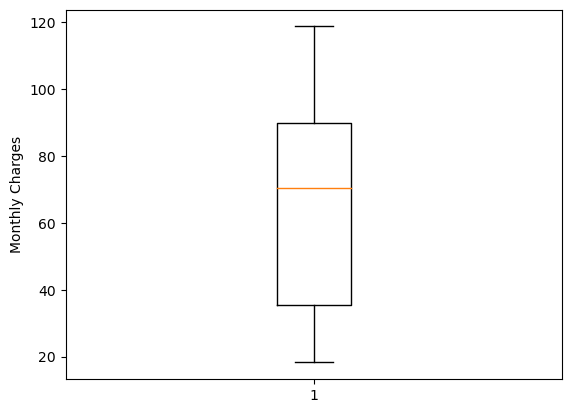

In [26]:
# Create a box plot of the MonthlyCharges column
plt.boxplot(df_telco['MonthlyCharges' ])
plt.ylabel('Monthly Charges')
plt.show()

From the boxplot one can see that the company's montlhy charges ranges between 39 to 90 dollars with some few outliers of a lower charge of 19 dollars and a higher charge of 190 dollars.

A histogram displaying the distribution of monthly charges 

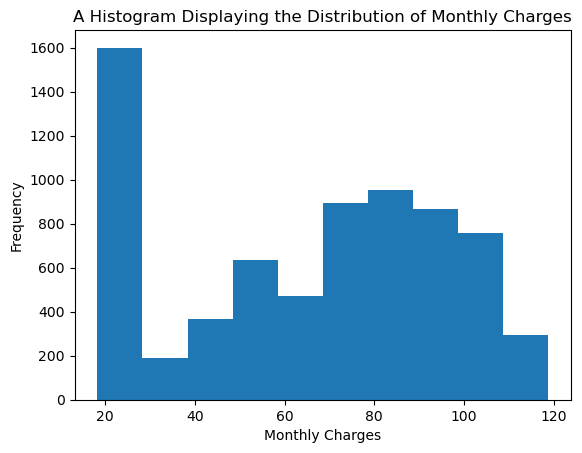

In [29]:
# Create a histogram of the MonthlyCharges column
plt.hist(df_telco['MonthlyCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title("A Histogram Displaying the Distribution of Monthly Charges")
plt.show()

**Lets take a look at the TotalCharges column**

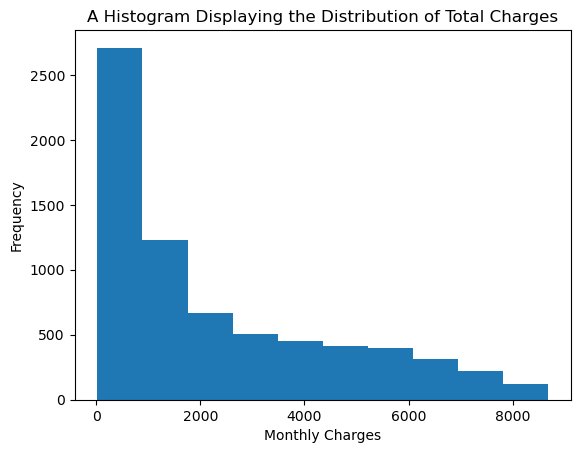

In [30]:
# Create a histogram of the MonthlyCharges column
plt.hist(df_telco['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title("A Histogram Displaying the Distribution of Total Charges")
plt.show()

**Now lets take a look at the churn column**

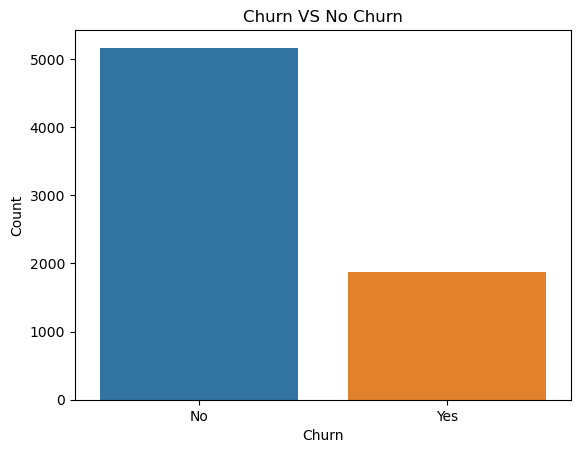

In [31]:
sns.countplot(x='Churn', data=df_telco)
plt.title("Churn VS No Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


**Now lets take a look at the various types of contracts** 

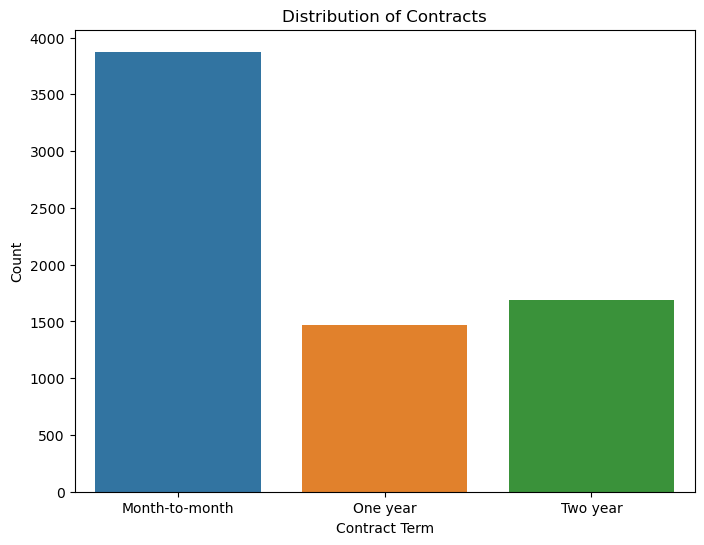

In [32]:
# Plot the distribution of the Contract column
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df_telco)
plt.title('Distribution of Contracts')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.show()

#**Bivariate Analysis**

**Lets see the relationship between Monthly charge and Total Charge and Customer Churn** 

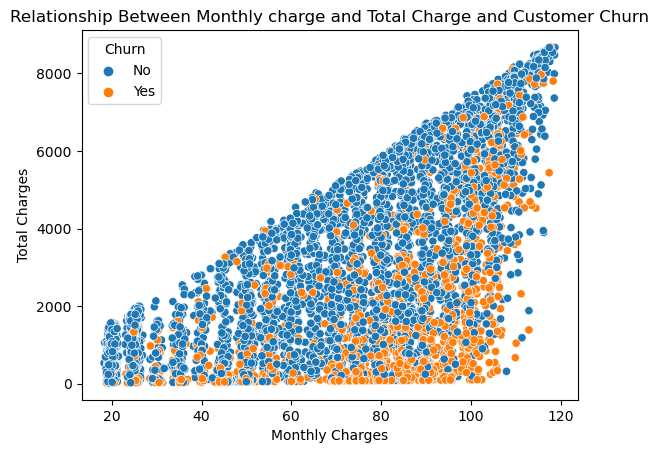

In [35]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_telco, hue="Churn")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title("Relationship Between Monthly charge and Total Charge and Customer Churn")
plt.show()


From the scatter plot one could identify that lot more customers churned when their monthly bills were rising between 70 to about 105 dollars. However lot more customers stayed when their Total Charges were rather going high.

**Lets check the relationship between Contract type and Customer Churn**

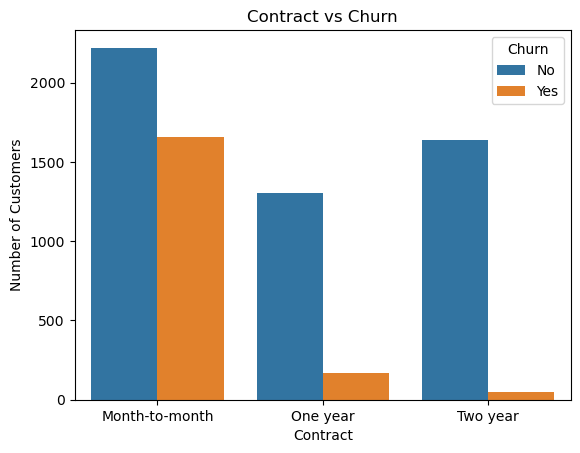

In [37]:
sns.countplot(x='Contract', hue='Churn', data=df_telco)
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()


We noticed that the longer the contract duration, the lower the churn rate. This might probably be due to the fact that customers pay more when they sign on to Monthly contracts.

Lets check the relationship between payment shedule and Churn

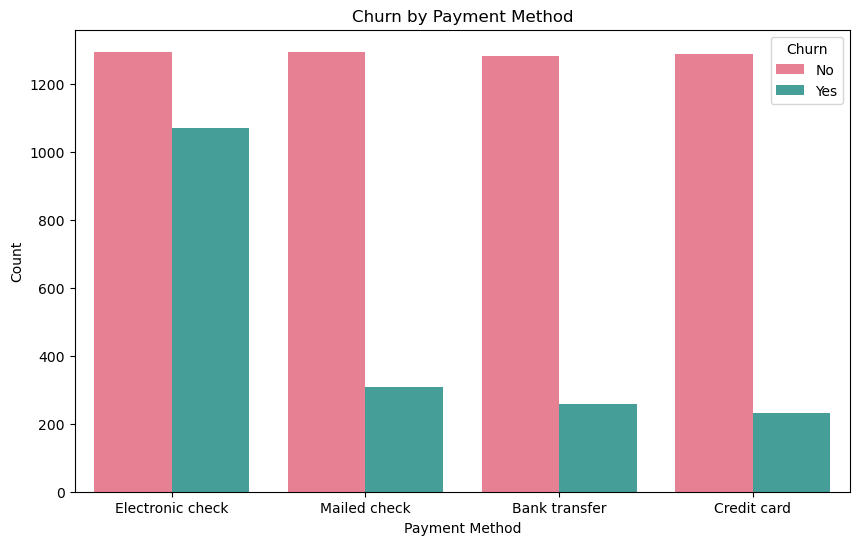

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_telco, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


From the chart we realised that customers with automated forms of payment such as Bank tranfer and Credit card had the lowest churn as compared to electronic check and mailed check.

**Lets check the relationship between Tenure and Churn**

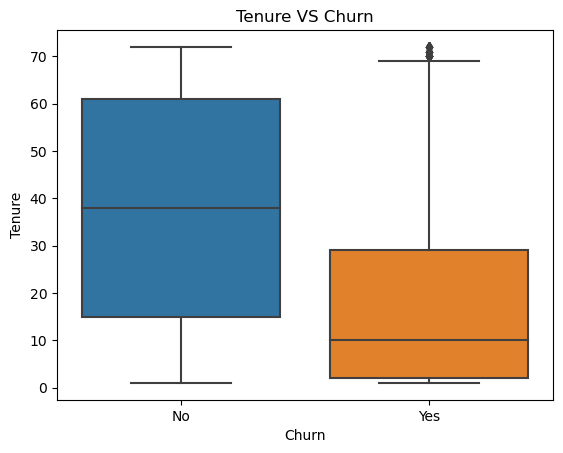

In [39]:
sns.boxplot(x='Churn', y='tenure', data=df_telco)
plt.title('Tenure VS Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure');


From the boxplot we could see that most customers churned before reaching their 40th month. This should be critically looked at.

**Lets also check the relationship between Senior Citizens and Churn**

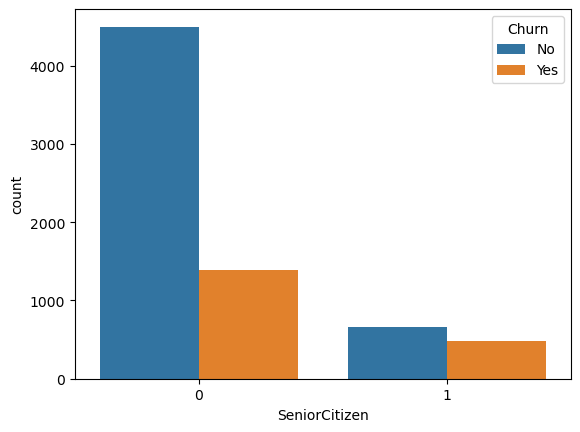

In [41]:

sns.countplot(x='SeniorCitizen', hue='Churn', data=df_telco);


The column chart above shows that Senior citizens who signed up with the company churned more as compared to non senior citizens. This might be due to old age and problably death.

**Lets check the relationship between internet service and churn**

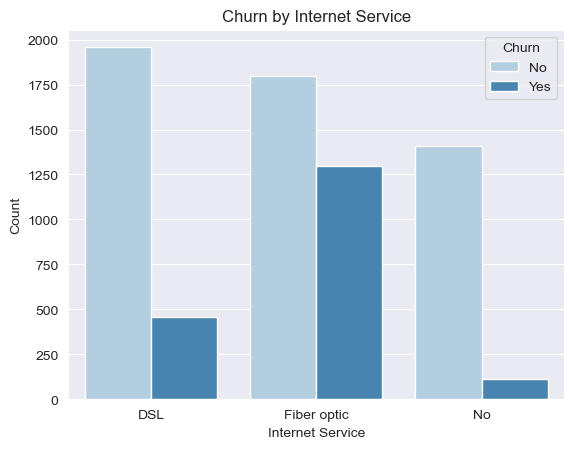

In [42]:
sns.set_style('darkgrid')

# Create a stacked bar plot
sns.countplot(x='InternetService', hue='Churn', data=df_telco, palette='Blues')

# Set the title and axis labels
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')

# Display the plot
plt.show()


The stacked bar chart above shows that the fibre optic subscribers churned the more also customers without internet do not churn as much as those with internet subscriptions.

**Multivariate Analysis**

Lets make a loop through the key variables and then create distribution plots to see the relationship between these variables and the number of customers.

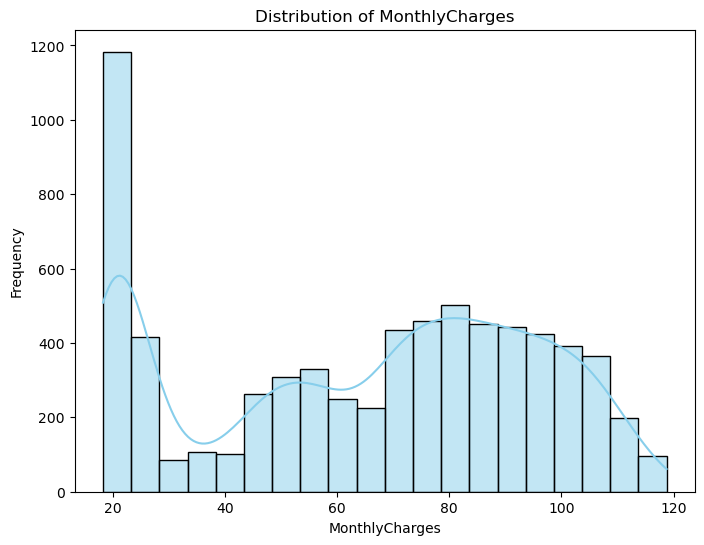

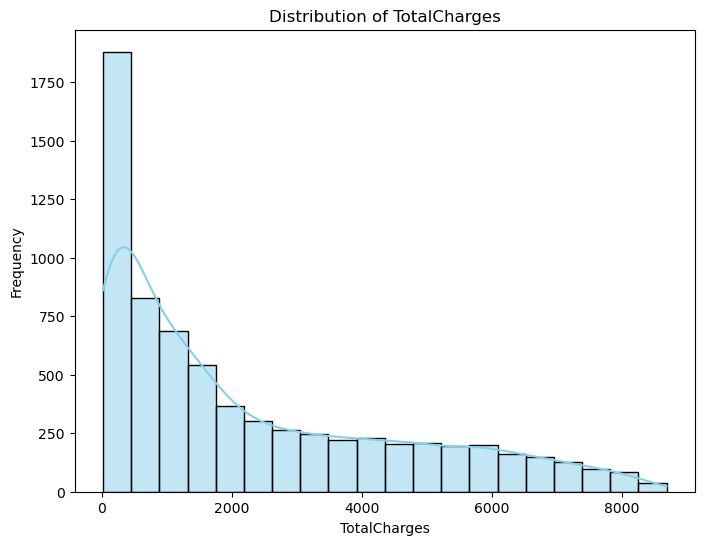

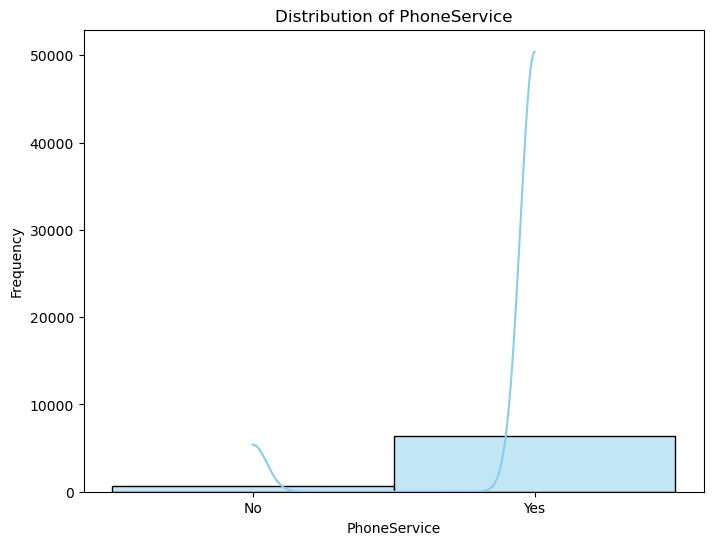

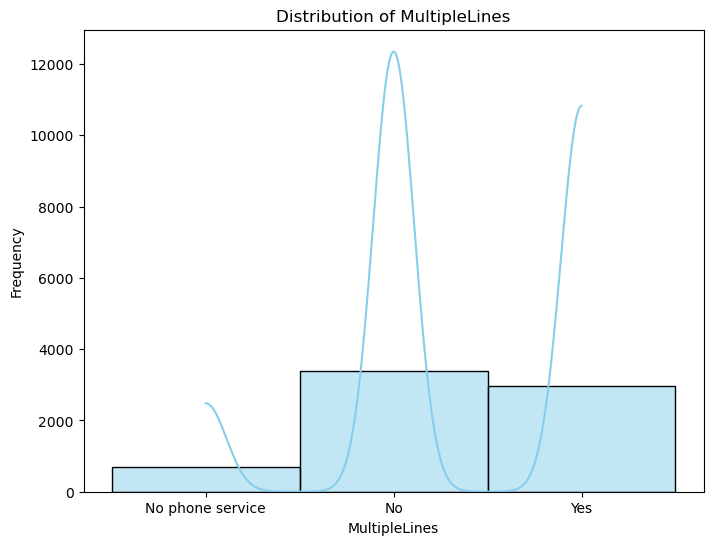

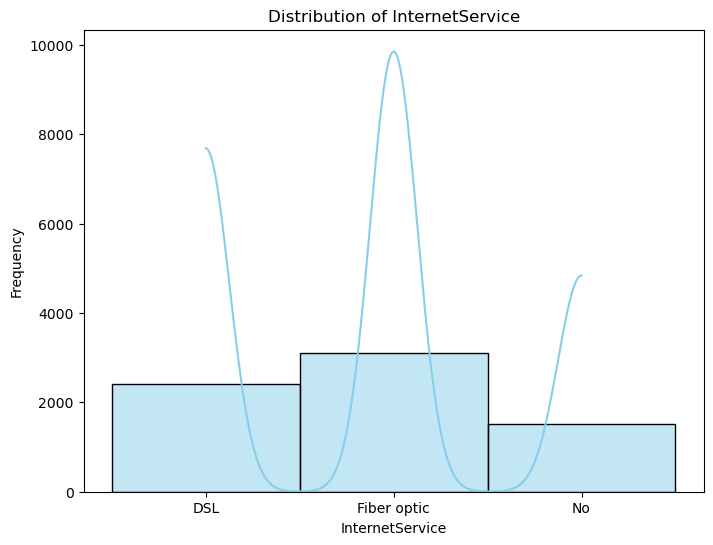

In [24]:
Key_variables = ["MonthlyCharges", "TotalCharges","PhoneService", "MultipleLines", "InternetService"]

# Loop through the key variables and create distribution plots
for variable in Key_variables:
    # Create a new figure for each variable
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,6))

    # Create  a histogram using seaborn
    import seaborn as sns
    sns.histplot(df_telco[variable], kde=True, bins=20, color="skyblue")

    # Set plot labels and title
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {variable}")

    # Show the plot
    plt.show()

 Lets create a heatmap to visualize the correlation between all numerical columns in the dataset. This can help us identify any strong positive or negative correlations between different features.

C:\Users\user\AppData\Local\Temp\ipykernel_7788\100924976.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_telco.corr()


<Axes: title={'center': 'Heatmap to Visualize the Correlation Between Variables'}>

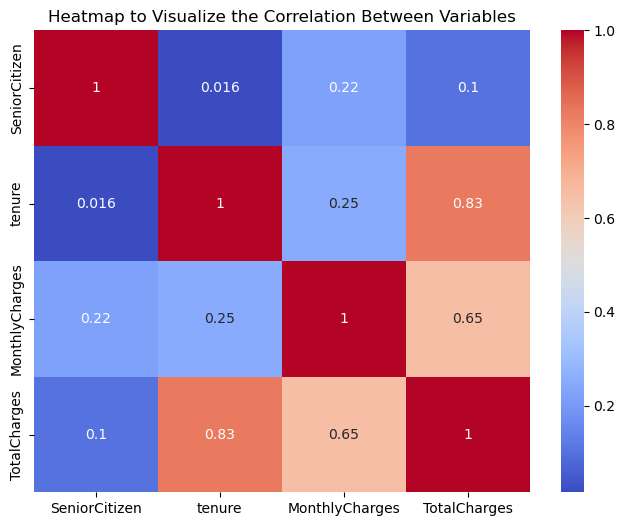

In [19]:
# Create correlation matrix
corr = df_telco.corr(numeric_only=True)

corr = df_telco.corr()

# Create heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
import seaborn as sns
plt.title("Heatmap to Visualize the Correlation Between Variables")
sns.heatmap(corr, annot=True, cmap='coolwarm')

What is the overall churn rate for the company?
Now lets look at the churn rate and also use pie chart to repreet the churned vs. unchurned.

In [43]:
churn_rate = df_telco['Churn'].value_counts(normalize=True)['Yes']
print("Overall Churn Rate: {:.2f}".format(churn_rate))

Overall Churn Rate: 0.27


In [23]:
# Ananlyze the Churn column

df_telco["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

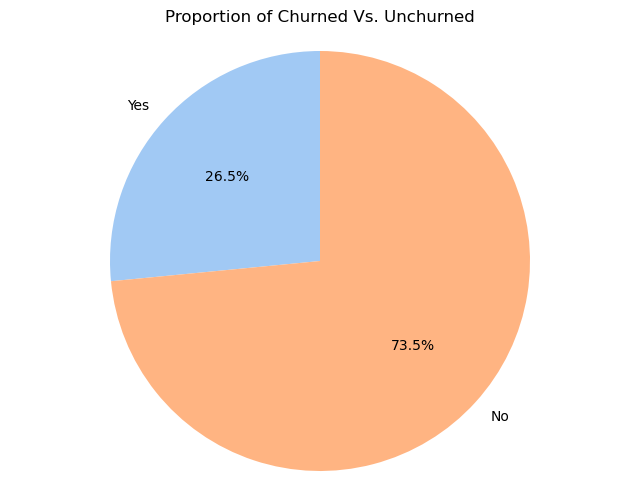

In [8]:
# Using Pie Chart to Represent Churned Vs. Unchurned
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {"Category":["Yes", "No"], "Values": [1869, 5174]}
plt.figure(figsize=(8, 6))
plt.pie(data["Values"], labels=data["Category"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Churned Vs. Unchurned")
plt.axis("equal")
plt.show()

From the pie chart above, it can be seen that 73.5% of the customers remain unchurned while only 26.5% of the customers churned. This is collaborated with the low churn rate of 0.27%.